## Section 1: Business Understanding

### Question : What are the factors contribue to Career Satisfaction relates? 

## Section 2: Data Understanding

### Gather and Explore data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
import WhatHappened as t2
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Explore data set with  total columns, total rows, data types, any null values in the data set

In [2]:
# Get number of rows, and number of clumns in Dataframe
df.shape
#num_rows = df.shape[0] #Provide the number of rows in the dataset
#num_cols = df.shape[1] #Provide the number of columns in the dataset

(19102, 154)

In [3]:
#df.dtypes
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [4]:
df.isnull().sum()

Respondent                         0
Professional                       0
ProgramHobby                       0
Country                            0
University                         0
EmploymentStatus                   0
FormalEducation                    0
MajorUndergrad                  3203
HomeRemote                      2631
CompanySize                     4449
CompanyType                     4493
YearsProgram                      97
YearsCodedJob                   3711
YearsCodedJobPast              18753
DeveloperType                   5330
WebDeveloperType               14816
MobileDeveloperType            18546
NonDeveloperType               17414
CareerSatisfaction              3000
JobSatisfaction                 3849
ExCoderReturn                  18767
ExCoderNotForMe                18770
ExCoderBalance                 18767
ExCoder10Years                 18766
ExCoderBelonged                18767
ExCoderSkills                  18766
ExCoderWillNotCode             18770
E

In [5]:
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [6]:
# Get all categorical columns in the data frame
Cat_df = df.select_dtypes(include=['object','O']) 
Cat_df.head()

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers
0,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,...,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree
1,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",...,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree
2,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Agree,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree
3,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,...,Agree,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree
4,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Get all numerical columns in the data frame and basic summary statistics for each column (or group by)
Num_df=df.select_dtypes(include=['float64','int'])
Num_df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


## Section 3: Data Preparation

### Assess Data

#### For Categorical variables selected:
FormalEducation, EmploymentStatus, YearsCodedJob, CompanySize
#### For Numerical variables selected:
CareerSatisfaction


In [8]:
set(schema[schema['Column']=='CareerSatisfaction']['Question'])

{'Career satisfaction rating'}

In [9]:
# Get the numerical data set
set(Num_df)

{'CareerSatisfaction',
 'ExpectedSalary',
 'HoursPerWeek',
 'JobSatisfaction',
 'Respondent',
 'Salary',
 'StackOverflowSatisfaction'}

In [10]:
# Get the categorical data set
set(Cat_df)

{'AnnoyingUI',
 'AssessJobCommute',
 'AssessJobCompensation',
 'AssessJobDept',
 'AssessJobDiversity',
 'AssessJobExp',
 'AssessJobFinances',
 'AssessJobIndustry',
 'AssessJobLeaders',
 'AssessJobOffice',
 'AssessJobProduct',
 'AssessJobProfDevel',
 'AssessJobProjects',
 'AssessJobRemote',
 'AssessJobRole',
 'AssessJobTech',
 'AuditoryEnvironment',
 'BoringDetails',
 'BuildingThings',
 'ChallengeMyself',
 'ChangeWorld',
 'CheckInCode',
 'ClickyKeys',
 'CollaborateRemote',
 'CompanySize',
 'CompanyType',
 'CompetePeers',
 'Country',
 'CousinEducation',
 'Currency',
 'DeveloperType',
 'DifficultCommunication',
 'DiversityImportant',
 'EducationImportant',
 'EducationTypes',
 'EmploymentStatus',
 'EnjoyDebugging',
 'EquipmentSatisfiedCPU',
 'EquipmentSatisfiedMonitors',
 'EquipmentSatisfiedRAM',
 'EquipmentSatisfiedRW',
 'EquipmentSatisfiedStorage',
 'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoder

In [11]:
# Assess of numerical data selected
df.CareerSatisfaction
df.CareerSatisfaction.isnull().count()

19102

In [12]:
# Assess of numerical data selected
# Percentage of values missing greater than 75%?
most_missing_cols=df['CareerSatisfaction'].isnull().mean() > 0.75
most_missing_cols

False

In [13]:
# Assess of numerical data selected
# Proportion of individuals in the dataset with career satisfaction reported
prop_sals = 1 - df.isnull()['CareerSatisfaction'].mean()

prop_sals

0.84294838236833836

In [14]:
# Assess of numerical data selected
# Count number of row with each unique value of variable
careerSat_vals = df.CareerSatisfaction.value_counts()
careerSat_vals

8.0     4247
7.0     3624
9.0     2127
10.0    2053
6.0     1684
5.0     1132
4.0      481
3.0      376
2.0      177
0.0      136
1.0       65
Name: CareerSatisfaction, dtype: int64

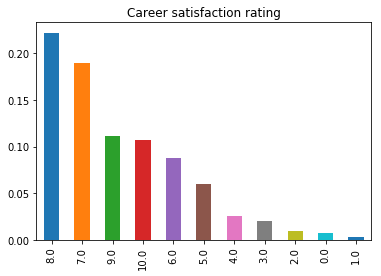

In [15]:
# Assess of numerical data selected
# Value distribution of the numerical data 
# Visualise the distribution using bar chart

(careerSat_vals/df.shape[0]).plot(kind="bar");
plt.title("Career satisfaction rating");

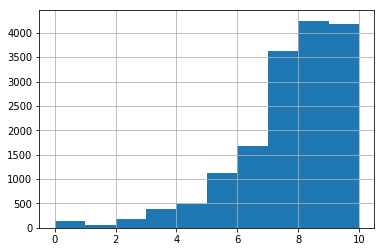

In [16]:
# Assess of numerical data selected
# Histogram distribution of the numerical data 
# Visualise the numerical data
df['CareerSatisfaction'].hist()

In [17]:
# Assess of numerical data selected
# Value distribution of the numerical data 
# Summary statistic of the numerical data
df['CareerSatisfaction'].describe().reset_index()

,index,CareerSatisfaction
0,count,16102.000000
1,mean,7.343932
2,std,1.919330
3,min,0.000000
4,25%,6.000000
5,50%,8.000000
6,75%,9.000000
7,max,10.000000


In [18]:
# Assess of Categorical data selected
# Extract the columns to a subset of data frame
cat_cols_lst = cat_df[['FormalEducation','EmploymentStatus','YearsCodedJob','CompanySize']]
cat_cols_lst.head()

NameError: name 'cat_df' is not defined

## Section 3: Data Preparation

### Clean Data

#### For Categorical variables selected:
FormalEducation, EmploymentStatus, YearsCodedJob, CompanySize
#### For Numerical variables selected:
CareerSatisfaction

In [19]:
# Clean data
# Drop rows with missing values
df_new = df.dropna(subset=['CareerSatisfaction'], axis=0)
df_new['CareerSatisfaction'].isnull().count()/df_new.shape[0]

1.0

## Section 4: Analyze Data 

#### For Categorical variables selected:
FormalEducation, EmploymentStatus, YearsCodedJob, CompanySize
#### For Numerical variables selected:
CareerSatisfaction

In [20]:
# Using statistics to answer questions and draw insight
# Groupby one column and return the mean of the remaining columns in each group
# Compute mean of groups, excluding missing values.
df_new.groupby(['FormalEducation']).mean()['CareerSatisfaction'].sort_values().dropna().reset_index()

,FormalEducation,CareerSatisfaction
0,I never completed any formal education,7.196581
1,Master's degree,7.300302
2,Bachelor's degree,7.322164
3,I prefer not to answer,7.338542
4,Secondary school,7.348285
5,Primary/elementary school,7.406897
6,Some college/university study without earning ...,7.424099
7,Professional degree,7.465812
8,Doctoral degree,7.574349


In [21]:
# Using statistics to answer questions and draw insight
# Groupby one column and return the mean of the remaining columns in each group
# Compute mean of groups, excluding missing values.
df_new.groupby(['EmploymentStatus']).mean()['CareerSatisfaction'].sort_values().dropna().reset_index()

,EmploymentStatus,CareerSatisfaction
0,"Not employed, but looking for work",5.020067
1,"Not employed, and not looking for work",6.715976
2,I prefer not to say,6.747967
3,Employed part-time,7.162011
4,Employed full-time,7.408127
5,"Independent contractor, freelancer, or self-em...",7.417947
6,Retired,8.153846


In [22]:
# Using statistics to answer questions and draw insight
# Groupby one column and return the mean of the remaining columns in each group
# Compute mean of groups, excluding missing values.
df_new.groupby(['YearsCodedJob']).mean()['CareerSatisfaction'].sort_values().dropna().reset_index()

,YearsCodedJob,CareerSatisfaction
0,Less than a year,6.976789
1,1 to 2 years,7.193828
2,2 to 3 years,7.324698
3,4 to 5 years,7.330261
4,13 to 14 years,7.331878
5,3 to 4 years,7.369400
6,19 to 20 years,7.392857
7,9 to 10 years,7.397933
8,18 to 19 years,7.398551
9,5 to 6 years,7.424215


In [23]:
# Using statistics to answer questions and draw insight
# Groupby one column and return the mean of the remaining columns in each group
# Compute mean of groups, excluding missing values.
df_new.groupby(['CompanySize']).mean()['CareerSatisfaction'].sort_values().dropna().reset_index()

,CompanySize,CareerSatisfaction
0,Fewer than 10 employees,7.276900
1,"10,000 or more employees",7.376396
2,"5,000 to 9,999 employees",7.382716
3,20 to 99 employees,7.385728
4,10 to 19 employees,7.386125
5,"1,000 to 4,999 employees",7.405000
6,I don't know,7.424370
7,500 to 999 employees,7.473976
8,100 to 499 employees,7.488691
9,I prefer not to answer,7.573684
